In [1]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Makes sure we see all columns
pd.set_option('display.max_columns', None)

In [2]:
# get data without MICE imputation
data = main(retained=True)
data.head()

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute clean data: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 51 seconds
Elapsed time to compute Full process: 2 minutes and 5 seconds


YEAR MMS Q1- Your sex? Q2- How old are you?          STATUS  \
0         1       A woman                  NaN         Workers   
1         1       A woman                  NaN       Employees   
2         1       A woman                  NaN       Employees   
3         1       A woman                  NaN       Employees   
4         1       A woman                  NaN  AM Technicians   

  In which sector of activity do you work?  \
0                                 Industry   
1  Wholesale trade (all businesses in 206)   
2  Wholesale trade (all businesses in 206)   
3  Wholesale trade (all businesses in 206)   
4  Wholesale trade (all businesses in 206)   

  What is the size of your business (in total, all locations combined)? 2009 fake  \
0                                50 to 249 employees                                
1                                50 to 249 employees                                
2                                50 to 249 employees                                
3                               250 to 999 employees                                
4                                50 to 249 employees                                

   Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                   
1                                                0.0                                                                   
2                                                2.0                                                                   
3                                                0.0                                                                   
4                                                0.0                                                                   

   Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                    
1                                                0.0                                                                    
2                                                0.0                                                                    
3                                                0.0                                                                    
4                                                0.0                                                                    

   Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                     
1                                                0.0                                                                     
2                                                0.0                                                                     
3                                                0.0                                                                     
4                                                2.0                                                                     

   Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                    
1                                                0.0                                                                    
2                                                0.0                                                                    
3                                                0.0                                                                    
4                               

In [3]:
data.shape

(44535, 100)

In [4]:
# remove all rows with YEAR MMS is 1 and 10

data = data[(data['YEAR MMS'] != 1) & (data['YEAR MMS'] != 10)]
data.shape

(37681, 100)

In [5]:
data_copy = data.copy()

In [117]:
data = data_copy.copy()

In [118]:
colNames

VAGUE             Q1                    Q2        STATUTTV  \
Code                                                                  
Q_En  YEAR MMS  Q1- Your sex?  Q2- How old are you?          STATUS   
cat        NaN             CU                    CO              CU   
opt          0              2                     6               4   
1          NaN          A man               18 - 30          Frames   
2          NaN        A woman               30 - 39  AM Technicians   
3          NaN            NaN               40 - 44       Employees   
4          NaN            NaN               45 - 49         Workers   
5          NaN            NaN               50 - 55             NaN   
6          NaN            NaN               56 - 70             NaN   
7          NaN            NaN                   NaN             NaN   
8          NaN            NaN                   NaN             NaN   
9          NaN            NaN                   NaN             NaN   
10         NaN            NaN                   NaN             NaN   
11         NaN            NaN                   NaN             NaN   

                                       SECTEUR  \
Code                                             
Q_En  In which sector of activity do you work?   
cat                                         CU   
opt                                          9   
1                                     Industry   
2                                 Construction   
3      Wholesale trade (all businesses in 206)   
4                              Retail business   
5                             Other businesses   
6                Design office and engineering   
7               Human health and social action   
8                                     Services   
9        Transport, energy, telecommunications   
10                                         NaN   
11                                         NaN   

                                                 TAILLE  \
Code                                                      
Q_En  What is the size of your business (in total, a...   
cat                                                  CO   
opt                                                   6   
1                                Less than 10 employees   
2                                    10 to 49 employees   
3                                   50 to 249 employees   
4                                  250 to 999 employees   
5                                1000 to 4999 employees   
6                               5000 employees and more   
7                                                   NaN   
8                                                   NaN   
9                                                   NaN   
10                                                  NaN   
11                                                  NaN   

                                                 Q4_3A6  \
Code                                                      
Q_En  Q4- (3 to 6 years old) In each of the followin...   
cat                                                  NU   
opt                                                   0   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
5                                                   NaN   
6                                                   NaN   
7                                                   NaN   
8                                                   NaN   
9                                                   NaN   
10                                                  NaN   
11                                                  NaN   

                                                Q4_7A12  \
Code                                                      
Q_En  Q4- (7 to 12 years old) In each of the followi...   
cat 

In [119]:
# get the data from retained.csv

retained_cols

0
0      VAGUE
1         Q1
2         Q2
3    Q2_2016
4         Q3
..       ...
75  Q401SEMR
76  Q40SU1MR
77   Q40SU3M
78    TAILLE
79  STATUTTV

[80 rows x 1 columns]

In [120]:
# get the long term retained columns
retained_long_cols = []
for col in retained_cols[0]:
    for short_col in colNames.columns:
        if col == short_col:
            retained_long_cols.append(colNames[short_col][0])
retained_long_cols[0].split("'")[0]

'YEAR MMS'

In [121]:
# remove the columns that are not in the retained_long_cols

for col in data.columns:
    if col == 'outcome':
        continue
    if col not in retained_long_cols:
        data = data.drop(col, axis=1)

In [122]:
data.head()

YEAR MMS Q1- Your sex? Q2- How old are you?          STATUS  \
2302         2         A man              30 - 39  AM Technicians   
2303         2         A man              18 - 30          Frames   
2304         2       A woman              45 - 49       Employees   
2305         2         A man              30 - 39          Frames   
2306         2         A man              56 - 70         Workers   

     In which sector of activity do you work?  \
2302  Wholesale trade (all businesses in 206)   
2303  Wholesale trade (all businesses in 206)   
2304  Wholesale trade (all businesses in 206)   
2305  Wholesale trade (all businesses in 206)   
2306                                 Industry   

     What is the size of your business (in total, all locations combined)? 2009 fake  \
2302                               250 to 999 employees                                
2303                                50 to 249 employees                                
2304                             Less than 10 employees                                
2305                                50 to 249 employees                                
2306                                 10 to 49 employees                                

      Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
2302                                                1.0                                                                   
2303                                                0.0                                                                   
2304                                                0.0                                                                   
2305                                                0.0                                                                   
2306                                                0.0                                                                   

      Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
2302                                                2.0                                                                    
2303                                                0.0                                                                    
2304                                                0.0                                                                    
2305                                                0.0                                                                    
2306                                                0.0                                                                    

      Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
2302                                                0.0                                                                     
2303                                                0.0                                                                     
2304                                                1.0                                                                     
2305                                                0.0                                                                     
2306                                                0.0                                                                     

      Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
2302                                                0.0                                                                    
2303                                                0.0                                                                    
2304                                                1.0                                                                    
2305                                

In [123]:
data.shape

(37681, 68)

In [124]:
# outcome counts

data['outcome'].value_counts()

0    24060
3     5662
1     4698
2     3261
Name: outcome, dtype: int64

In [125]:
# show nan values
for col in data.columns:
    print(col, data[col].isnull().sum())

YEAR MMS 0
Q1- Your sex? 34
Q2- How old are you? 39
STATUS 2
In which sector of activity do you work? 2
What is the size of your business (in total, all locations combined)? 2009 fake 26
Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you? 0
Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you? 1
Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you? 0
Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you? 0
Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly? 52
Q9- Are you working? 69
Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours? 121
Q12- Do you work most often? 304
Q13- Is the performance of your work 

In [126]:
# create an empty list to store the first 5 characters of the column names called five_chars
# loop through the columns 
    # take the first 5 characters of column name
    # if its not in the five_chars list, add it to the list
    # if its already in the five_chars list, then put it in to another variable called multi_col
# loop through all the columns again and get all the columns that have the same first 5 characters as multi_col
    # loop through each row of those columns and check if all the values are nan
        # if all the values in the row are nan, then drop the row
        # if there is even one value that is not nan in that row, then keep the row
        # fill the nan values of that row with 0

five_chars = []
multi_col = []

for col in data.columns:
    first_five = col[:5]
    if first_five not in five_chars:
        five_chars.append(first_five)
    else:
        if first_five not in multi_col:
            multi_col.append(first_five)

for col2 in multi_col:
    all_cols_with_same_first_five = []

    for col_name in data.columns:
        if col2 in col_name:
            all_cols_with_same_first_five.append(col_name)

    for index, row in data.iterrows():
        all_nans = True
        for col_name2 in all_cols_with_same_first_five:
            if not pd.isnull(row[col_name2]):
                all_nans = False
                break
        if all_nans:
            data.drop(index, inplace=True)
        else:
            for col_name3 in all_cols_with_same_first_five:
                if pd.isnull(row[col_name3]):
                    data.at[index, col_name3] = 0
                    


In [127]:
# show nan values
for col in data.columns:
    print(col, data[col].isnull().sum())

YEAR MMS 0
Q1- Your sex? 0
Q2- How old are you? 26
STATUS 0
In which sector of activity do you work? 0
What is the size of your business (in total, all locations combined)? 2009 fake 11
Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you? 0
Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you? 0
Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you? 0
Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you? 0
Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly? 23
Q9- Are you working? 43
Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours? 94
Q12- Do you work most often? 242
Q13- Is the performance of your work ta

In [128]:
data.shape

(32492, 68)

In [129]:
x = data.shape[0] - 32327
x

165

In [130]:
# show nan values
for col in data.columns:
    if data[col].isnull().sum() >= x:
        print(col, data[col].isnull().sum())

Q12- Do you work most often? 242
Q16- And for each of these sentences?-I would recommend my company to a friend 5022
Q58- For each of these drinks, indicate whether you consume them:-At least once a week 5868


In [131]:
# value counts of Q16- And for each of these sentences?-I would recommend my company to a friend
data['Q16- And for each of these sentences?-I would recommend my company to a friend'].value_counts()

Rather         13194
Rather not      6775
Completetly     4182
Not at all      3319
Name: Q16- And for each of these sentences?-I would recommend my company to a friend, dtype: int64

In [132]:
# convert all nan values of Q16- And for each of these sentences?-I would recommend my company to a friend to 0
data['Q16- And for each of these sentences?-I would recommend my company to a friend'] = data['Q16- And for each of these sentences?-I would recommend my company to a friend'].fillna(0)

In [133]:
data['Q58- For each of these drinks, indicate whether you consume them:-At least once a week'].value_counts()

Energy drinks (like Red Bull or Monster)    12515
Alcoholic beverages                         11566
Sodas                                        2543
Name: Q58- For each of these drinks, indicate whether you consume them:-At least once a week, dtype: int64

In [134]:
# convert all nan values of Q58- For each of these drinks, indicate whether you consume them:-At least once a week to 0
data['Q58- For each of these drinks, indicate whether you consume them:-At least once a week'] = data['Q58- For each of these drinks, indicate whether you consume them:-At least once a week'].fillna(0)

In [135]:
# convert all nan values of Q12- Do you work most often? to 0
data['Q12- Do you work most often?'] = data['Q12- Do you work most often?'].fillna(0)

In [136]:
# drop the rows with nan values 
data = data.dropna()
data.shape

(31666, 68)

In [137]:
data['outcome'].value_counts()

0    20899
3     4498
1     3700
2     2569
Name: outcome, dtype: int64

In [138]:
data.drop('YEAR MMS', axis=1, inplace=True)

In [139]:
data.tail()

Q1- Your sex? Q2- How old are you?     STATUS  \
39978       A woman              30 - 39  Employees   
39979       A woman              40 - 44  Employees   
39980       A woman              30 - 39  Employees   
39981       A woman              40 - 44  Employees   
39982         A man              30 - 39    Workers   

      In which sector of activity do you work?  \
39978           Human health and social action   
39979                                 Services   
39980           Human health and social action   
39981                                 Services   
39982    Transport, energy, telecommunications   

      What is the size of your business (in total, all locations combined)? 2009 fake  \
39978                               250 to 999 employees                                
39979                                50 to 249 employees                                
39980                                50 to 249 employees                                
39981                                50 to 249 employees                                
39982                                50 to 249 employees                                

       Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
39978                                                1.0                                                                   
39979                                                1.0                                                                   
39980                                                0.0                                                                   
39981                                                0.0                                                                   
39982                                                0.0                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
39978                                                1.0                                                                    
39979                                                0.0                                                                    
39980                                                0.0                                                                    
39981                                                0.0                                                                    
39982                                                0.0                                                                    

       Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
39978                                                0.0                                                                     
39979                                                0.0                                                                     
39980                                                0.0                                                                     
39981                                                0.0                                                                     
39982                                                0.0                                                                     

       Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
39978                                                0.0                                                                    
39979                                                0.0                                                                    
39980                                                0.0                                                                    
39981                                                0.0                              

In [140]:
categorical_cols = [col for col in data.columns if col not in not_cat]
data_features = data.drop('outcome', axis=1)
# one hot encode the data
data2 = pd.get_dummies(data_features[categorical_cols], drop_first=True)
data = pd.concat([data2, data['outcome']], axis=1)


# from sklearn.preprocessing import OneHotEncoder

# categorical_cols = [col for col in data.columns if col not in not_cat]
# t5 = time()
# # Initialize the OneHotEncoder
# # drop='first' to avoid multicollinearity
# encoder = OneHotEncoder(drop='if_binary', dtype='int')

# for cols in categorical_cols:
#     data[cols] = data[cols].astype(str)
    
# # Fit and transform the categorical columns
# encoded_array = encoder.fit_transform(data[categorical_cols])

# # convert encoder.get_feature_names_out() numpy.ndarray object to an array
# encoded_array = encoded_array.toarray()

# # Create a DataFrame from the encoded array
# encoded_df = pd.DataFrame(
#     encoded_array, columns=[encoder.get_feature_names_out()])

# data1 = data.drop(categorical_cols, axis=1)

# # concatinate the encoded to not_to_cat columns
# data = pd.concat([data1, encoded_df], axis=1)

# t6 = time()
# print(time_e(t5, t6, v="OneHotEncoding"))

In [141]:
data.head()

Q1- Your sex?_A woman  Q2- How old are you?_30 - 39  \
7153                      0                             0   
7154                      0                             0   
7155                      0                             0   
7156                      0                             1   
7157                      0                             1   

      Q2- How old are you?_40 - 44  Q2- How old are you?_45 - 49  \
7153                             0                             1   
7154                             1                             0   
7155                             1                             0   
7156                             0                             0   
7157                             0                             0   

      Q2- How old are you?_50 - 55  Q2- How old are you?_56 - 70  \
7153                             0                             0   
7154                             0                             0   
7155                             0                             0   
7156                             0                             0   
7157                             0                             0   

      STATUS_Employees  STATUS_Frames  STATUS_Workers  \
7153                 0              1               0   
7154                 0              1               0   
7155                 0              0               1   
7156                 0              1               0   
7157                 0              1               0   

      In which sector of activity do you work?_Design office and engineering  \
7153                                                  0                        
7154                                                  0                        
7155                                                  0                        
7156                                                  0                        
7157                                                  0                        

      In which sector of activity do you work?_Human health and social action  \
7153                                                  0                         
7154                                                  0                         
7155                                                  0                         
7156                                                  0                         
7157                                                  0                         

      In which sector of activity do you work?_Industry  \
7153                                                  0   
7154                                                  0   
7155                                                  1   
7156                                                  1   
7157                                                  0   

      In which sector of activity do you work?_Other businesses  \
7153                                                  0           
7154                                                  0           
7155                                                  0           
7156                                                  0           
7157                                                  0           

      In which sector of activity do you work?_Retail business  \
7153                                                  0          
7154                                                  0          
7155                                                  0          
7156                                                  0          
7157                                                  0          

      In which sector of activity do you work?_Services  \
7153                                                  0   
7154                                                  0   
7155                                                  0   
7156                                                  0   
7157                                                  0   



In [142]:
data.tail()

Q1- Your sex?_A woman  Q2- How old are you?_30 - 39  \
39978                      1                             1   
39979                      1                             0   
39980                      1                             1   
39981                      1                             0   
39982                      0                             1   

       Q2- How old are you?_40 - 44  Q2- How old are you?_45 - 49  \
39978                             0                             0   
39979                             1                             0   
39980                             0                             0   
39981                             1                             0   
39982                             0                             0   

       Q2- How old are you?_50 - 55  Q2- How old are you?_56 - 70  \
39978                             0                             0   
39979                             0                             0   
39980                             0                             0   
39981                             0                             0   
39982                             0                             0   

       STATUS_Employees  STATUS_Frames  STATUS_Workers  \
39978                 1              0               0   
39979                 1              0               0   
39980                 1              0               0   
39981                 1              0               0   
39982                 0              0               1   

       In which sector of activity do you work?_Design office and engineering  \
39978                                                  0                        
39979                                                  0                        
39980                                                  0                        
39981                                                  0                        
39982                                                  0                        

       In which sector of activity do you work?_Human health and social action  \
39978                                                  1                         
39979                                                  0                         
39980                                                  1                         
39981                                                  0                         
39982                                                  0                         

       In which sector of activity do you work?_Industry  \
39978                                                  0   
39979                                                  0   
39980                                                  0   
39981                                                  0   
39982                                                  0   

       In which sector of activity do you work?_Other businesses  \
39978                                                  0           
39979                                                  0           
39980                                                  0           
39981                                                  0           
39982                                                  0           

       In which sector of activity do you work?_Retail business  \
39978                                                  0          
39979                                                  0          
39980                                                  0          
39981                                                  0          
39982                                                  0          

       In which sector of activity do you work?_Services  \
39978                                                  0   
39979                                                  1   
39980                                                  0   
39981                                                  1   
39

In [143]:
data.columns = [str(i) for i in data.columns]

In [144]:
data.shape

(31666, 219)

In [145]:
# show the first row that has a nan value in any of the columns
data[data.isnull().any(axis=1)].head(1)

Empty DataFrame
Columns: [Q1- Your sex?_A woman, Q2- How old are you?_30 - 39, Q2- How old are you?_40 - 44, Q2- How old are you?_45 - 49, Q2- How old are you?_50 - 55, Q2- How old are you?_56 - 70, STATUS_Employees, STATUS_Frames, STATUS_Workers, In which sector of activity do you work?_Design office and engineering, In which sector of activity do you work?_Human health and social action, In which sector of activity do you work?_Industry, In which sector of activity do you work?_Other businesses, In which sector of activity do you work?_Retail business, In which sector of activity do you work?_Services, In which sector of activity do you work?_Transport, energy, telecommunications, In which sector of activity do you work?_Wholesale trade (all businesses in 206), What is the size of your business (in total, all locations combined)? 2009 fake_250 to 999 employees, What is the size of your business (in total, all locations combined)? 2009 fake_50 to 249 employees, What is the size of your business (in total, all locations combined)? 2009 fake_Less than 10 employees, Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives elsewhere, Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives with me, Q9- Are you working?_Part time, Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_Yes, Q12- Do you work most often?_At customers, Q12- Do you work most often?_At home teleworking, Q12- Do you work most often?_In a commercial premises or agency, Q12- Do you work most often?_In a shared office (3 to 5 people), Q12- Do you work most often?_In a shared work space - co-working, Q12- Do you work most often?_In a vehicle, Q12- Do you work most often?_In a workshop, a technical room, Q12- Do you work most often?_In an office alone or in pairs, Q12- Do you work most often?_In an open space, a tray, Q12- Do you work most often?_Outside-outside, Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture_Most of the time, Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture_Never, Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture_Occasionally, Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture_Rarely, Q13- Is the performance of your work taxing on you?-To carry or move heavy loads_Most of the time, Q13- Is the performance of your work taxing on you?-To carry or move heavy loads_Never, Q13- Is the performance of your work taxing on you?-To carry or move heavy loads_Occasionally, Q13- Is the performance of your work taxing on you?-To carry or move heavy loads_Rarely, Q13- Is the performance of your work taxing on you?-To perform repetitive gestures_Most of the time, Q13- Is the performance of your work taxing on you?-To perform repetitive gestures_Never, Q13- Is the performance of your work taxing on you?-To perform repetitive gestures_Occasionally, Q13- Is the performance of your work taxing on you?-To perform repetitive gestures_Rarely, Q13- Is the performance of your work taxing on you?-To work on screen_Most of the time, Q13- Is the performance of your work taxing on you?-To work on screen_Never, Q13- Is the performance of your work taxing on you?-To work on screen_Occasionally, Q13- Is the performance of your work taxing on you?-To work on screen_Rarely, Q13- Is the performance of your work taxing on you?-Working in the cold / in the heat_Most of the time, Q13- Is the performance of your work taxing on you?-Working in the cold / in the heat_Never, Q13- Is the performance of your work taxing on you?-Working in the cold / in the heat_Occasionally, Q13- Is the performance of your work taxing on you?

In [146]:
#  show a row with nan values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[data[col].isnull()]
        break

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### No SL vs VSSL

In [148]:
# get only the rows with outcome 0 and 1
data_01 = data[(data['outcome'] == 0) | (data['outcome'] == 1)] 

In [149]:
X = data_01.drop('outcome', axis=1)

# Correct the TypeError: Feature names are only supported if all input features have string names, but your input has ['str', 'tuple'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.
X.columns = [str(i) for i in X.columns]
# get the outcome column
y = data_01['outcome']

# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
# random forest algorithm using conditional inference trees and variable importance using an AUC-based permutation measure

# create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample')

# fit the classifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [151]:
# get the predictions
y_pred = clf.predict(X_test)

# get the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# get the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# get the roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(roc_auc)

# get the fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)

# get the auc
auc_score = auc(fpr, tpr)
auc_score

0.8517615176151762
[[6271    0]
 [1094   15]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6271
           1       1.00      0.01      0.03      1109

    accuracy                           0.85      7380
   macro avg       0.93      0.51      0.47      7380
weighted avg       0.87      0.85      0.79      7380

0.5067628494138864
[0. 0. 1.] [0.        0.0135257 1.       ] [2 1 0]


0.5067628494138864

In [152]:
# variable importance using an AUC-based permutation measure
from sklearn.inspection import permutation_importance

# get the permutation importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

# get the sorted indices of the permutation importance
sorted_idx = perm_importance.importances_mean.argsort()

# get the feature names
feature_names = X_test.columns

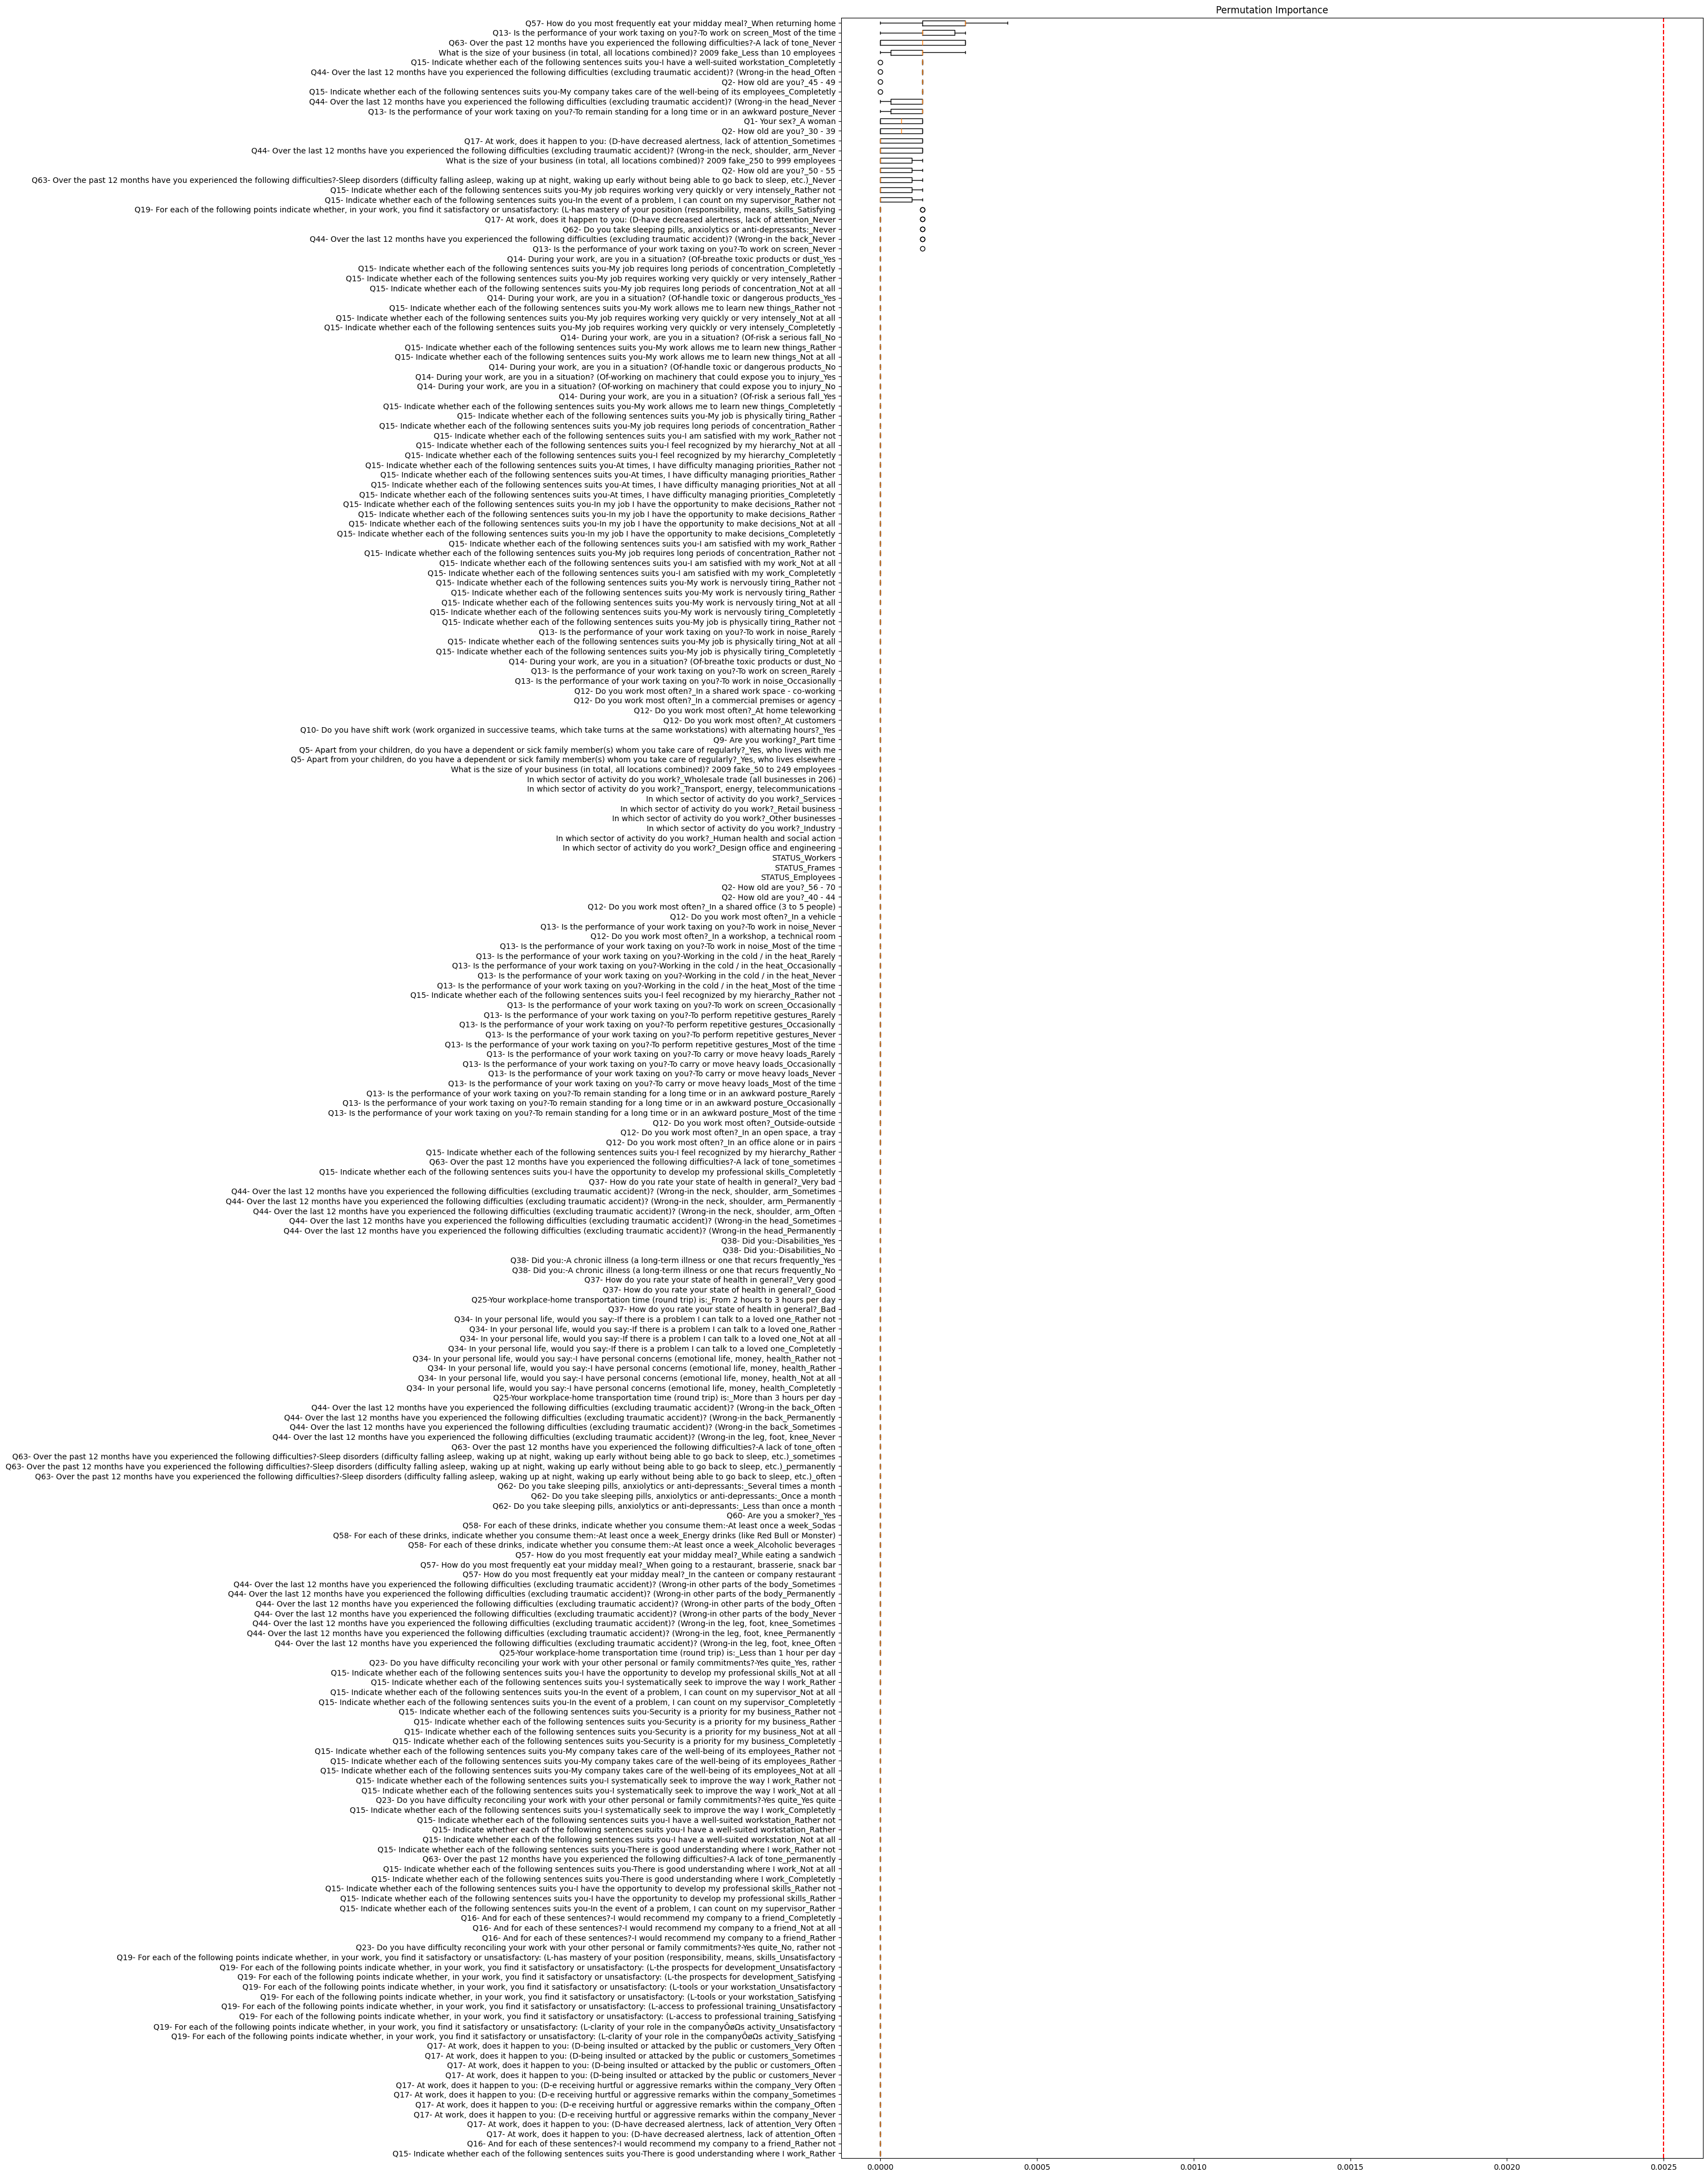

In [153]:
# plot the permutation importance
plt.figure(figsize=(20, 50))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx])
# dotted line represents 0.0025 importance
plt.axvline(x=0.0025, color='r', linestyle='--')
plt.title("Permutation Importance")
plt.show()

### No SL Vs SSL

In [154]:
# get only the rows with outcome 0 and 2
data_02 = data[(data['outcome'] == 0) | (data['outcome'] == 2)] 

In [155]:
X = data_02.drop('outcome', axis=1)
# get the outcome column
y = data_02['outcome']

# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [156]:
# random forest algorithm using conditional inference trees and variable importance using an AUC-based permutation measure

# create a random forest classifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample')

# fit the classifier to the training data
clf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [157]:
# get the predictions
y_pred = clf2.predict(X_test)

# get the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# get the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# get the roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(roc_auc)

# get the fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
print(fpr, tpr, thresholds)

# get the auc
auc_score = auc(fpr, tpr)
auc_score

0.888084078966056
[[6248    0]
 [ 788    5]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6248
           2       1.00      0.01      0.01       793

    accuracy                           0.89      7041
   macro avg       0.94      0.50      0.48      7041
weighted avg       0.90      0.89      0.84      7041

0.5031525851197982
[0. 0. 1.] [0.         0.00630517 1.        ] [3 2 0]


0.5031525851197982

In [158]:
# get the permutation importance
perm_importance = permutation_importance(clf2, X_test, y_test, n_repeats=10, random_state=42)

# get the sorted indices of the permutation importance
sorted_idx = perm_importance.importances_mean.argsort()

# get the feature names
feature_names = X_test.columns

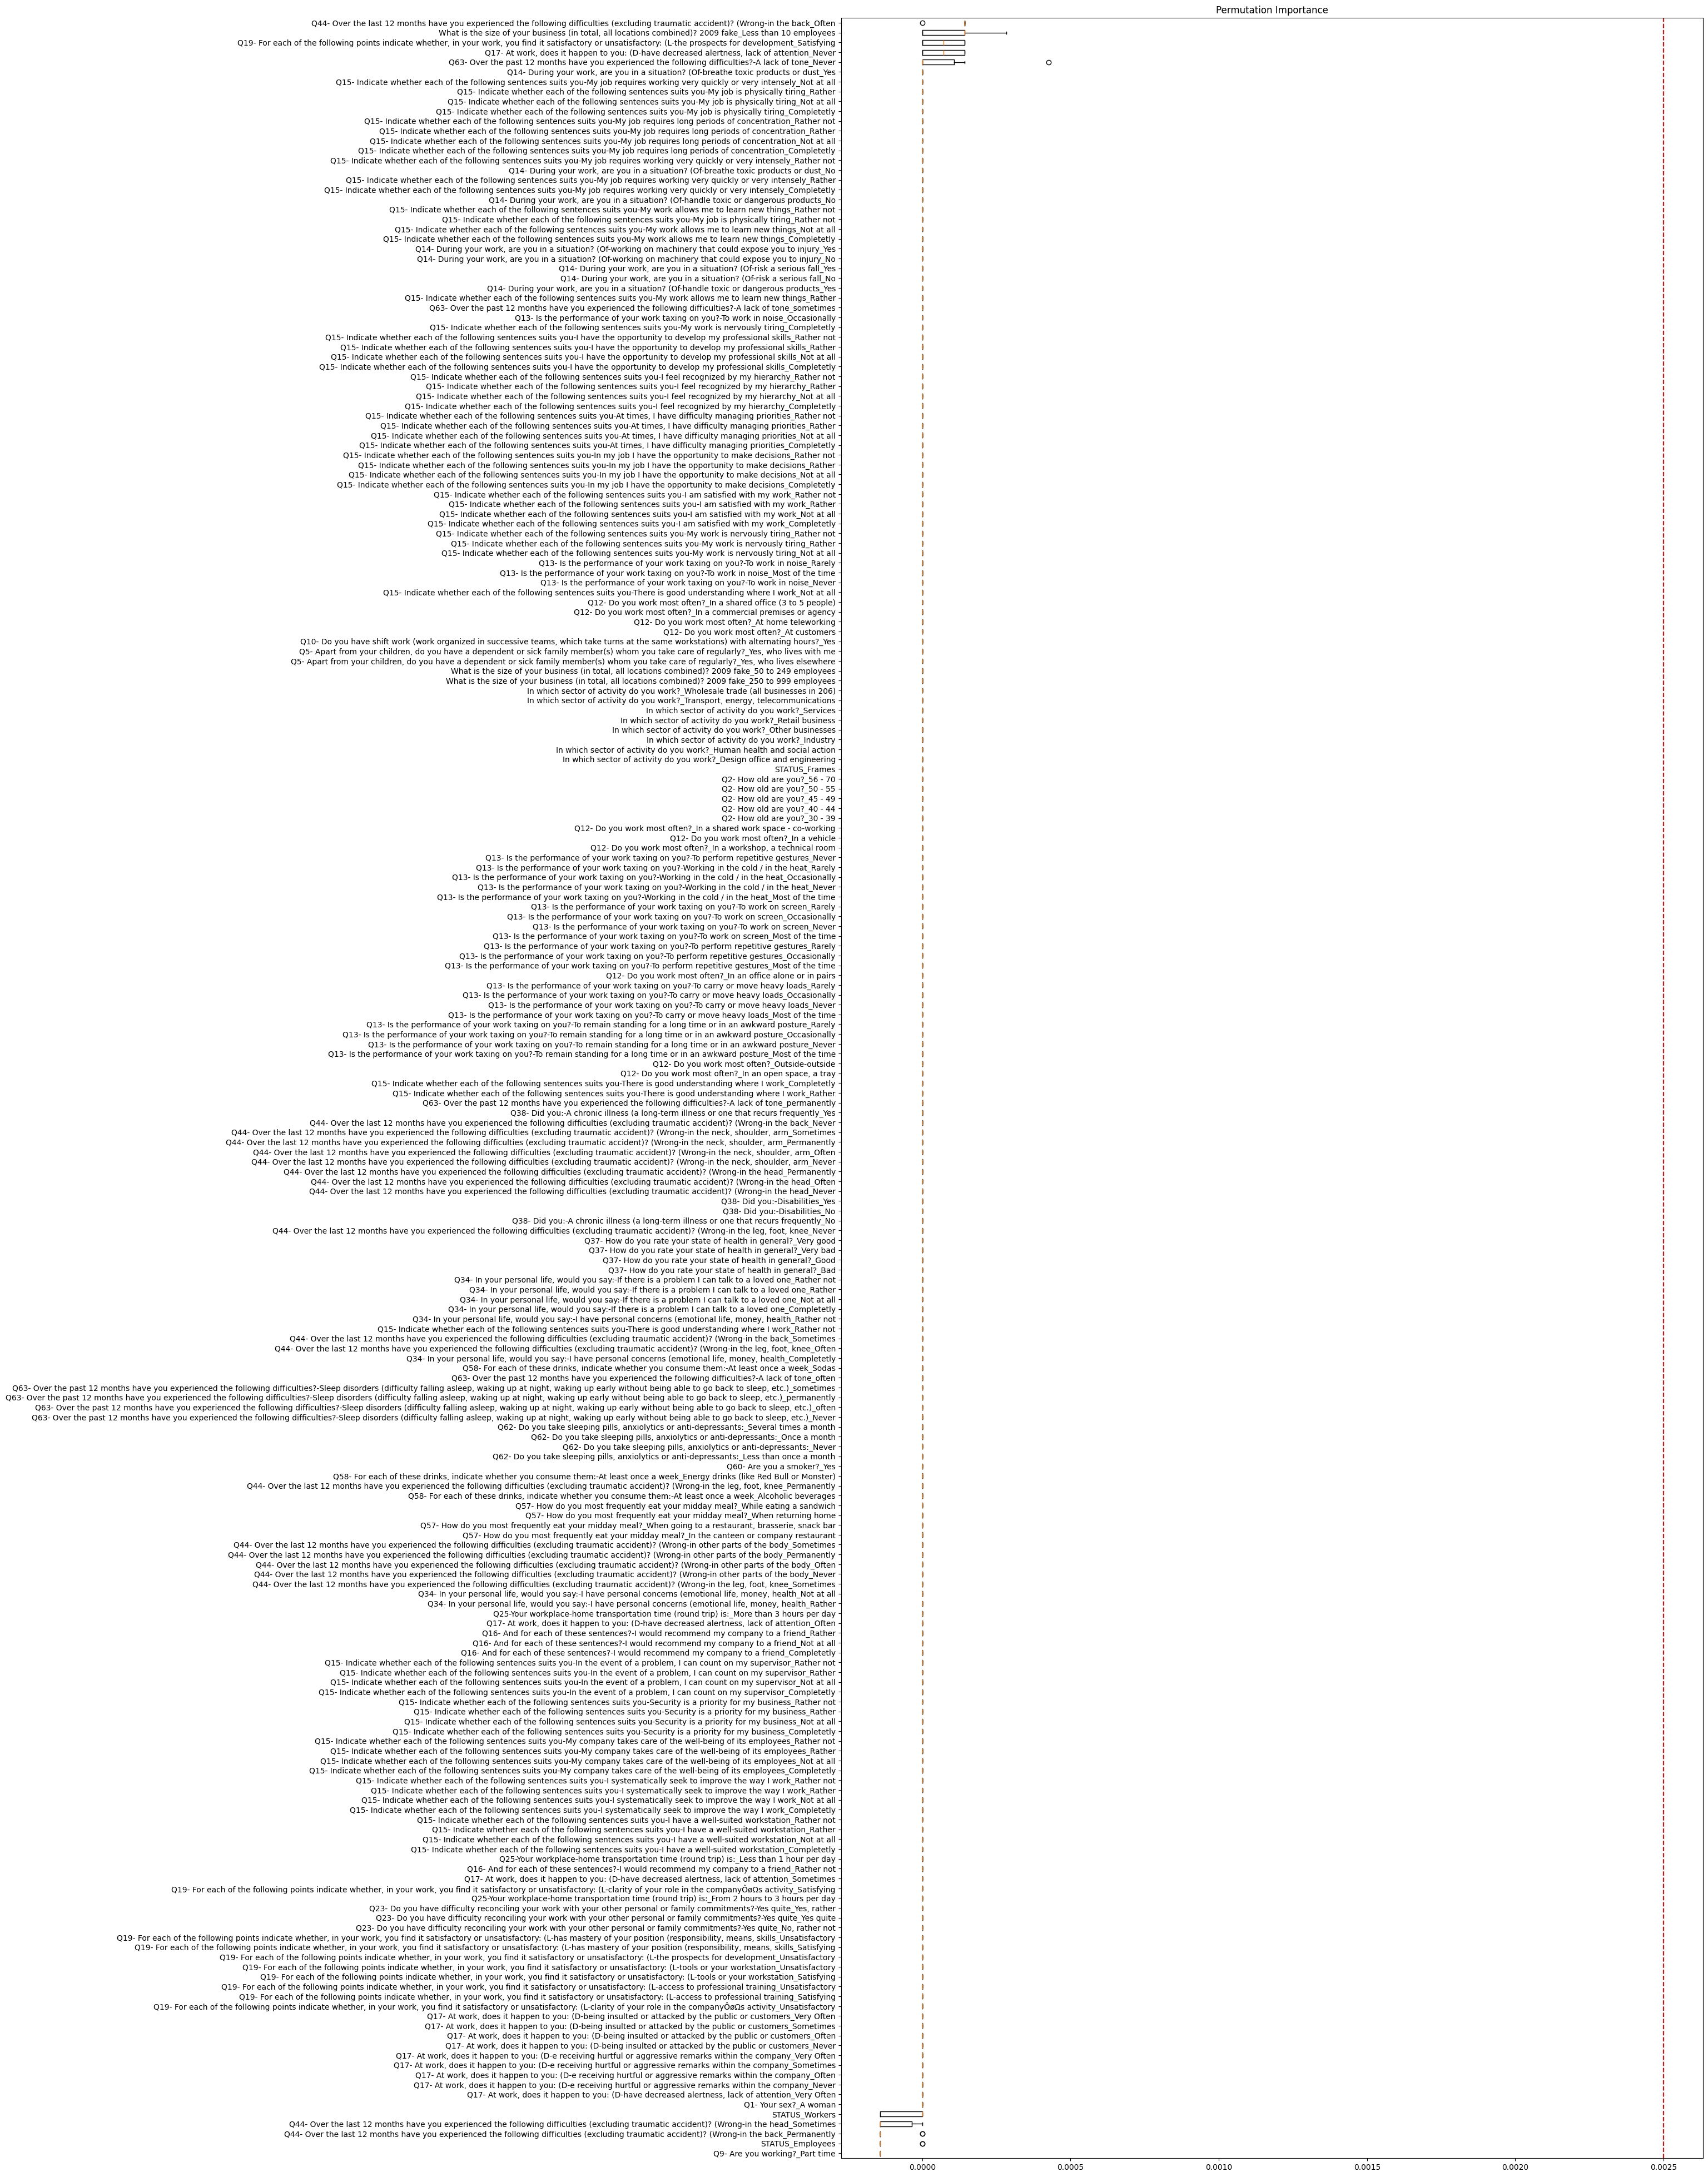

In [159]:
# plot the permutation importance
plt.figure(figsize=(20, 50))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx])
# dotted line represents 0.0025 importance
plt.axvline(x=0.0025, color='r', linestyle='--')
plt.title("Permutation Importance")
plt.show()

### No SL vs LSL

In [160]:
# get only the rows with outcome 0 and 3
data_03 = data[(data['outcome'] == 0) | (data['outcome'] == 3)] 

In [161]:
X = data_03.drop('outcome', axis=1)
# get the outcome column
y = data_03['outcome']

# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [162]:
# random forest algorithm using conditional inference trees and variable importance using an AUC-based permutation measure

# create a random forest classifier
clf3 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample')

# fit the classifier to the training data
clf3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [163]:
# get the predictions
y_pred = clf3.predict(X_test)

# get the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# get the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# get the roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred, average='macro')
print(roc_auc)

# get the fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=3)
print(fpr, tpr, thresholds)

# get the auc
auc_score = auc(fpr, tpr)
auc_score

0.8270341207349081
[[6145   58]
 [1260  157]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      6203
           3       0.73      0.11      0.19      1417

    accuracy                           0.83      7620
   macro avg       0.78      0.55      0.55      7620
weighted avg       0.81      0.83      0.77      7620

0.5507235725286476
[0.         0.00935031 1.        ] [0.         0.11079746 1.        ] [4 3 0]


0.5507235725286476

In [164]:
# get the permutation importance
perm_importance = permutation_importance(clf3, X_test, y_test, n_repeats=10, random_state=42)

# get the sorted indices of the permutation importance
sorted_idx = perm_importance.importances_mean.argsort()

# get the feature names
feature_names = X_test.columns

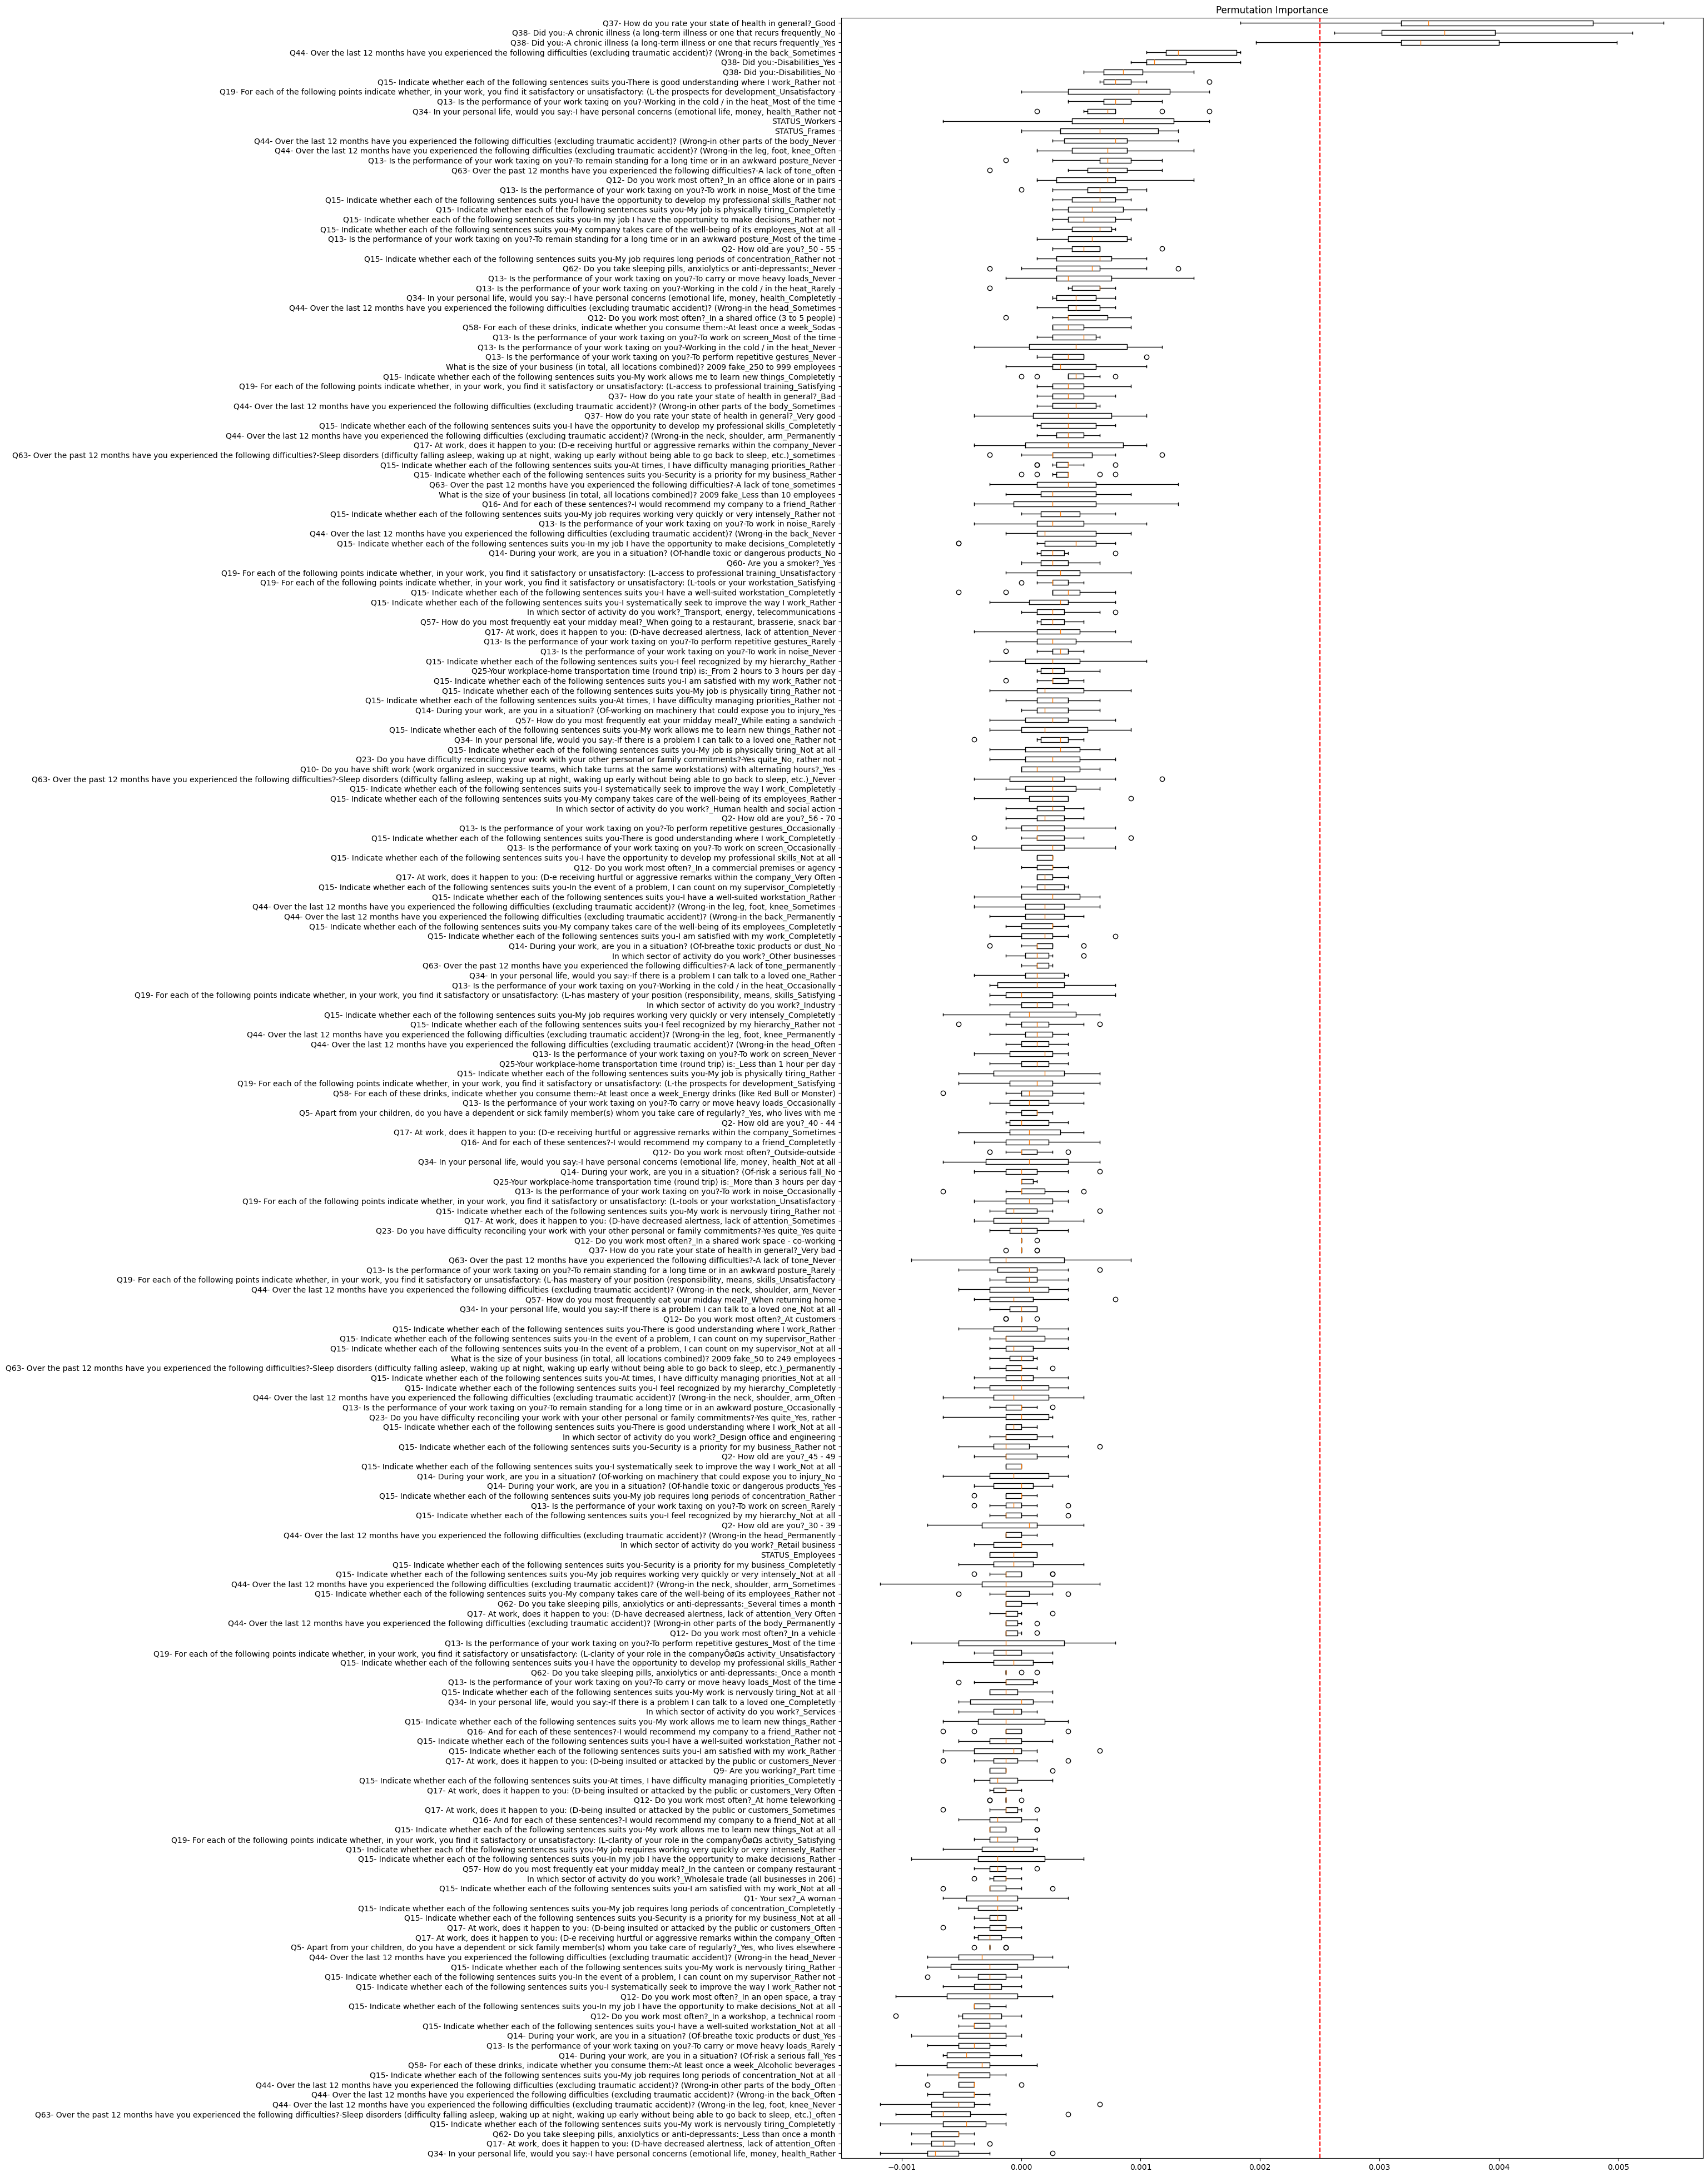

In [165]:
# plot the permutation importance
plt.figure(figsize=(20, 50))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx])
# dotted line represents 0.0025 importance
plt.axvline(x=0.0025, color='r', linestyle='--')
plt.title("Permutation Importance")
plt.show()